**Answer the following questions for the given US census data.**

Instructions:
- Drop duplicate records if present.
- Create visualizations where ever necessary.
- Submit your work in Jupyter Notebook and in HTML format with all the results.





**Data Dictionary:**

Unique values of features:
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

**1. How many men and women (*sex* feature) are represented in this dataset?** 

**2. What is the average age (*age* feature) of women?**

**3. What is the proportion of German citizens (*native-country* feature)?**

**4-5. What are mean value and standard deviation of the age of those who recieve more than 50K per year (*salary* feature) and those who receive less than 50K per year?**

**6. Is it true that people who receive more than 50k have at least high school education? (*education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

**7. Display statistics of age for each race (*race* feature) and each gender. Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

**8. Among whom the proportion of those who earn a lot(>50K) is more: among married or single men (*marital-status* feature)? Consider married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours and what is the percentage of those who earn a lot among them?**

**10. Count the average time of work (*hours-per-week*) those who earning a little and a lot (*salary*) for each country (*native-country*).**


**11. Which workclass gets the highest salary?**


**12. Draw your own insights from the given data apart from the given list of questions.**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(r"C:\Deloitte_Docs\Data_Science\Jigsaw Academy\Data_Exploratory_Assignments\EDA&V-Assignment 2\EDA_Assignment2.csv", encoding ="latin1")

In [5]:
df.head()

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country salary  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [7]:
df.duplicated().sum()

24

In [8]:
df=df.drop_duplicates()
df

age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse    Exec-managerial        Husband  White    Male   
2                Divorced  Handlers-cleaners  Not-in-family  White    Male   
3      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
...                   ...                ...            ...    ...     ...   
32556  Married-civ-spouse       Tech-support           Wife  White  Female   
32557  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32558             Widowed       Adm-clerical      Unmarried  White  Female   
32559       Never-married       Adm-clerical      Own-child  White    Male   
32560  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country salary  
0              2174             0              40  United-States  <=50K  
1                 0             0              13  United-States  <=50K  
2                 0             0              40  United-States  <=50K  
3                 0             0              40  United-States  <=50K  
4                 0             0              40           Cuba  <=50K  
...             ...           ...             ...            ...    ...  
32556             0             0              38  United-States  <=50K  
32557             0             0              40  United-States   >50K  
32558             0             0              40  United-States  <=50K  
32559             0             0              20  United-States  <=50K  
32560         15024             0              40  United-States   >50K  

[32537 rows x 15 columns]

In [9]:
df.duplicated().sum()

0

In [10]:
# 1. How many men and women (sex feature) are represented in this dataset?

In [11]:
df['sex'].value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

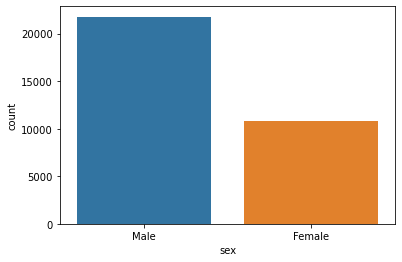

In [12]:
sns.countplot(x='sex',data =df )


In [13]:
# 2. What is the average age (age feature) of women?

In [14]:
df.loc[df['sex'] == 'Female', 'age'].mean()

36.864709161865825

In [15]:
## Just for the Outcome or summary of the given data set.
df.loc[df['sex'] == 'Male', 'age'].mean()

39.43605051664753

In [16]:
# 3. What is the proportion of German citizens (native-country feature)?

In [17]:
(float((df['native-country']== "Germany").sum())/df.shape[0])*100

0.4210591019454774

In [18]:
# 4-5. What are mean value and standard deviation of the age of those who recieve more than 50K per
# year (salary feature) and those who receive less than 50K per year?

In [19]:
age1 = df.loc[df['salary']=='>50K','age']
age2 = df.loc[df['salary']== '<=50K','age']
a1=age1.mean()
a2=age2.mean()
a_1=age1.std()
a_2=age2.std()

In [20]:
print("Average age for those who are earnig more than >50K is: ",a1,"and it's standard devi
print("Average age for those who are earnig less than <=50K is: ",a2,"and it's standard dev

SyntaxError: EOL while scanning string literal (3173067641.py, line 1)